In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Importing the dataset. Dataset Source - Forage x PWC Power BI Job Simulation

df = pd.read_csv(r"C:\Users\ARYA GUPTA\Desktop\Projects Data\02 Churn-Dataset.csv")

In [7]:
df.shape

(7043, 23)

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
# Dropping customerID column as we don't need it for modelling

df = df.drop(columns = ['customerID'])

df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No


In [13]:
# printing the unique values present in all the columns

for col in df.columns:
    print(col, df[col].unique())
    print("*" * 50)

gender ['Female' 'Male']
**************************************************
SeniorCitizen [0 1]
**************************************************
Partner ['Yes' 'No']
**************************************************
Dependents ['No' 'Yes']
**************************************************
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
**************************************************
PhoneService ['No' 'Yes']
**************************************************
MultipleLines ['No phone service' 'No' 'Yes']
**************************************************
InternetService ['DSL' 'Fiber optic' 'No']
**************************************************
OnlineSecurity ['No' 'Yes']
**************************************************
OnlineBackup ['Yes' 'No']
**************************************************


In [15]:
#separating all the columns on which we don't want to apply Label encoder or one hot encoder;

numerical_features_list = ['tenure', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets', 'numTechTickets']

In [16]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64

In [17]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

ValueError: could not convert string to float: ' '

In [21]:
# checking the no. of entries where TotalCharges is null. We can observe that all the rows having missing TotalCharges have tenure 0.
# which means that this are new customers and hence they don't have any previous charges adding up for them.

len(df[df['TotalCharges'] == ' '])

11

In [22]:
# replacing the " " empty space with float 0.0 

df['TotalCharges'] = df['TotalCharges'].replace(" ", "0.0")

In [23]:
# converting the object to float data type

df['TotalCharges'] = df['TotalCharges'].astype(float)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [25]:
# checking the class distribution of the target class
# we can check that the data isn't balanced here and we need to upsample the data to give the model enough room to learn

df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [26]:
df.drop(columns = ['numAdminTickets', 'numTechTickets'], inplace = True)

In [27]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


**Exploratory Data Analysis**

In [34]:
def plot_histogram(df, column_name):
    plt.figure(figsize = (5, 5))
    sns.histplot(df[column_name], kde = True)
    plt.title(f"Distribution of {column_name}")

    # calculating the mean and median values for the columns
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()

    # adding vertical lines for mean and median
    plt.axvline(col_mean, color = 'red', linestyle = "--", label = 'Mean')
    plt.axvline(col_median, color = 'green', linestyle = "-", label = 'Median')

    plt.legend()
    
    plt.show()

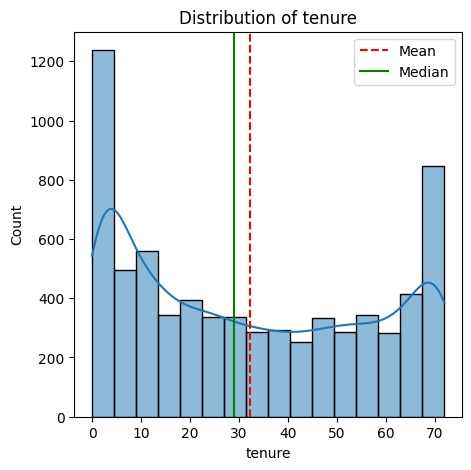

In [36]:
plot_histogram(df, 'tenure')

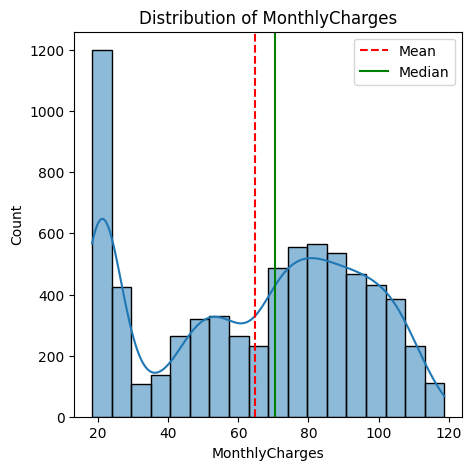

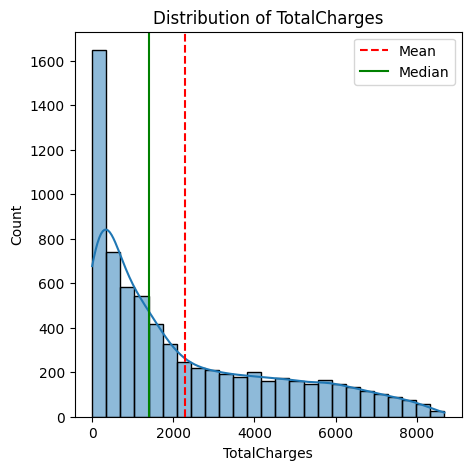

In [35]:
plot_histogram(df, 'MonthlyCharges')
plot_histogram(df, 'TotalCharges')

In [37]:
def plot_boxplot(df, column_name):
    plt.figure(figsize = (5, 5))
    sns.boxplot( y = df[column_name])
    plt.title(f"Box Plot for {column_name}")
    plt.ylabel(column_name)
    plt.show()

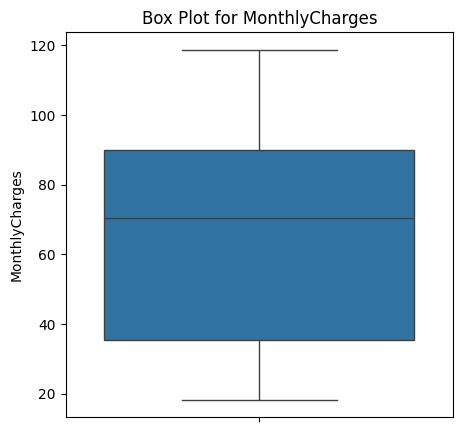

In [38]:
plot_boxplot(df, 'MonthlyCharges')

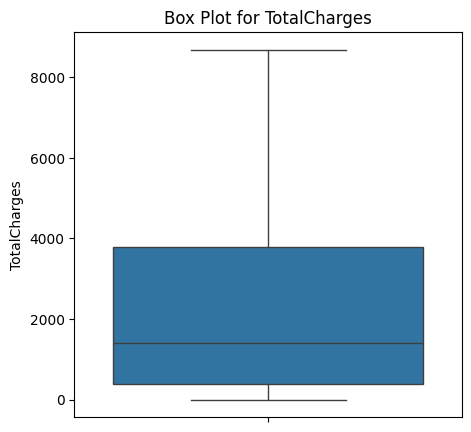

In [39]:
plot_boxplot(df, 'TotalCharges')

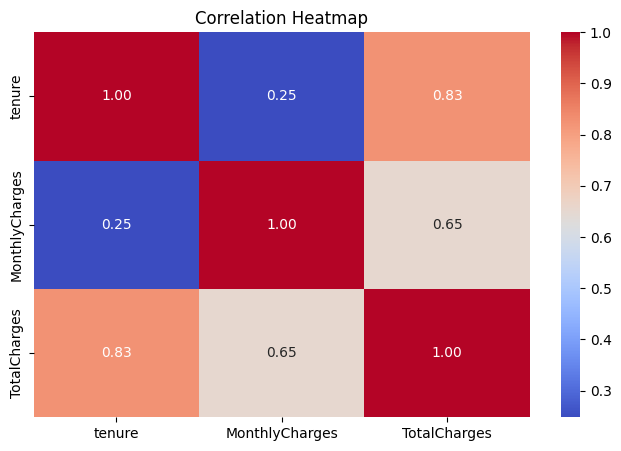

In [40]:
plt.figure(figsize = (8, 5))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot =  True, cmap = 'coolwarm', fmt=".2f")  #we are specifying a list in which all the column names have been specified
plt.title('Correlation Heatmap')
plt.show()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [42]:
object_cols = df.select_dtypes(include = 'object').columns.to_list()
object_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [43]:
object_cols = ['SeniorCitizen'] + object_cols

object_cols

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

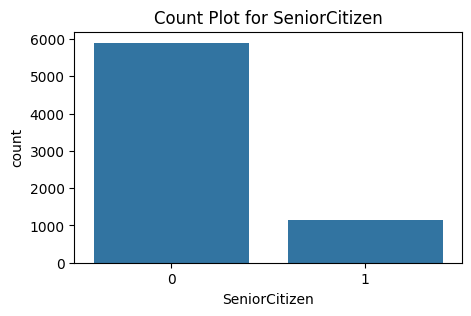

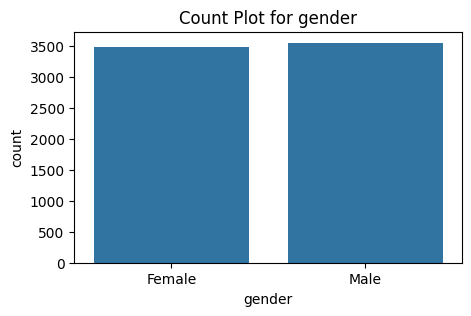

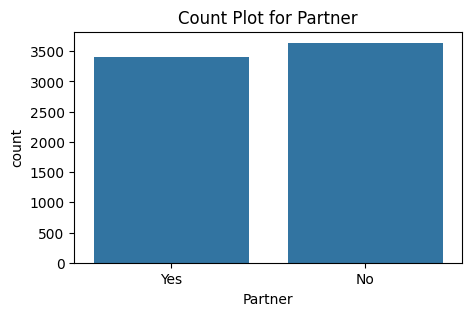

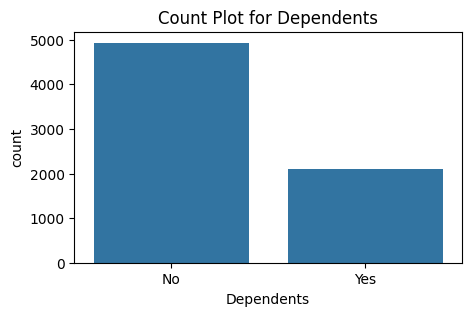

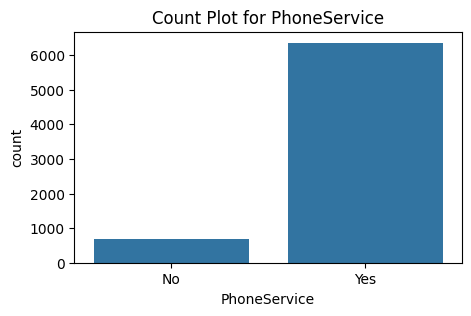

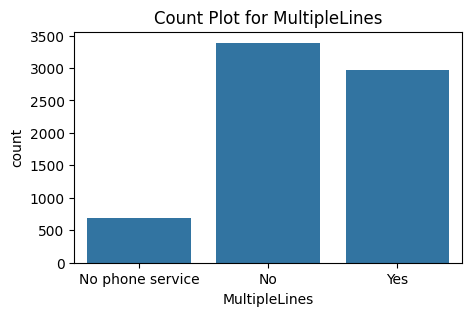

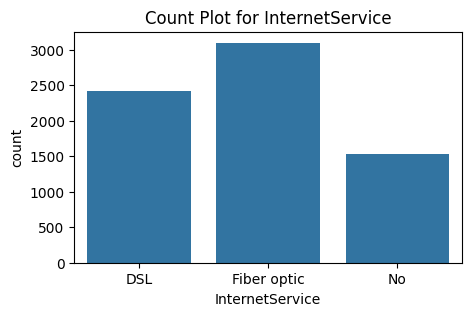

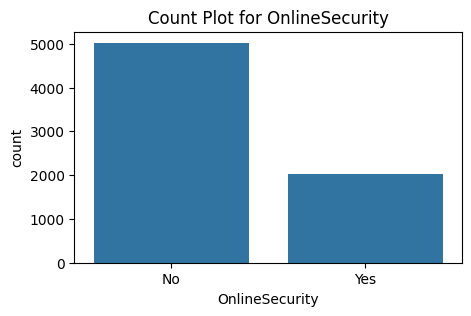

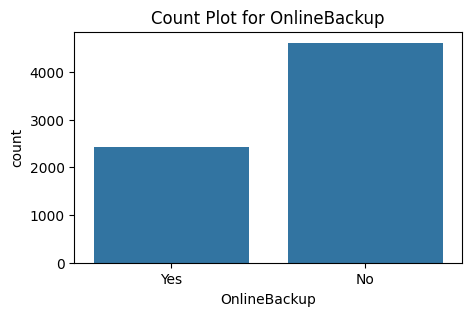

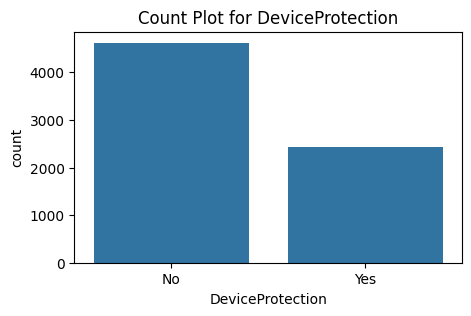

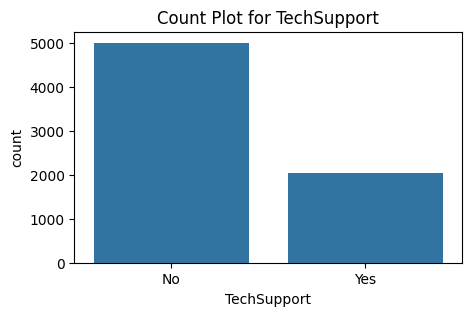

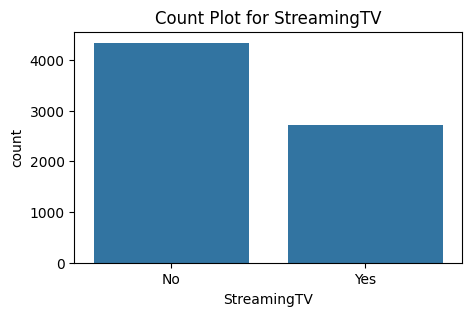

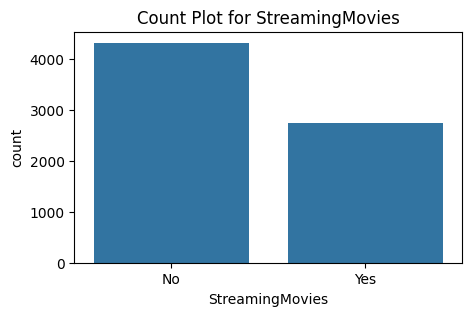

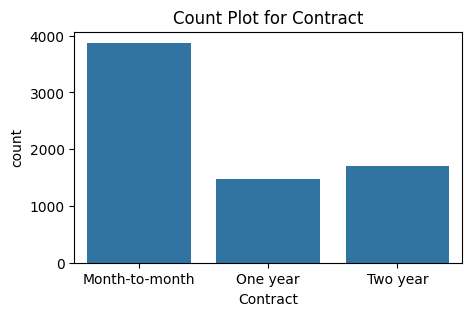

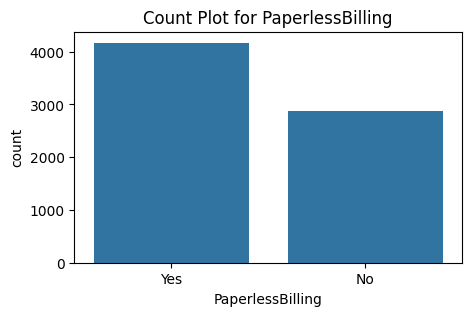

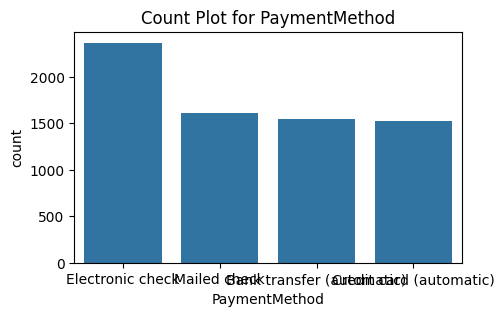

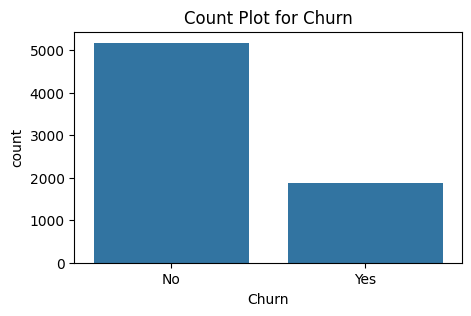

In [44]:
for col in object_cols:
    plt.figure(figsize = (5,3))
    sns.countplot(x = df[col])
    plt.title(f"Count Plot for {col}")
    plt.show()

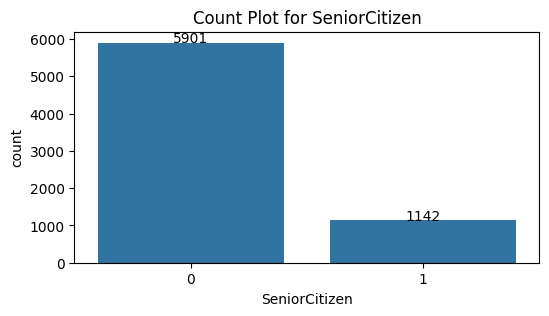

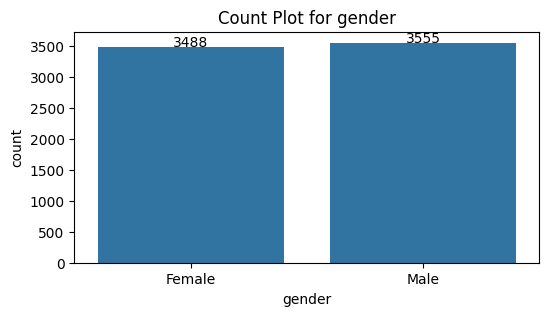

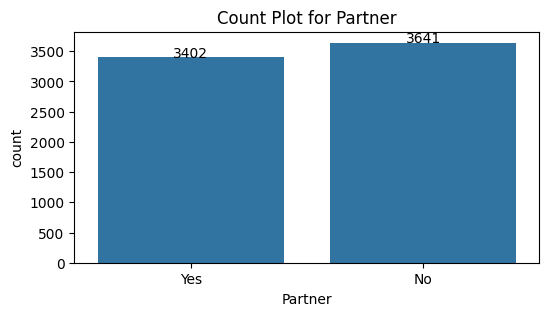

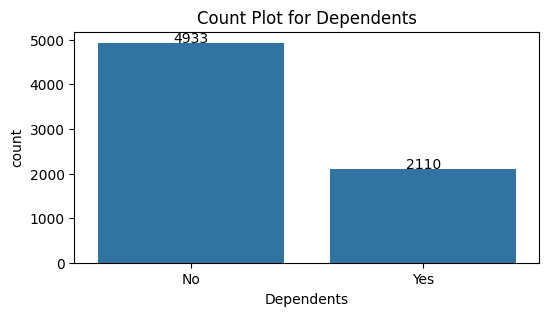

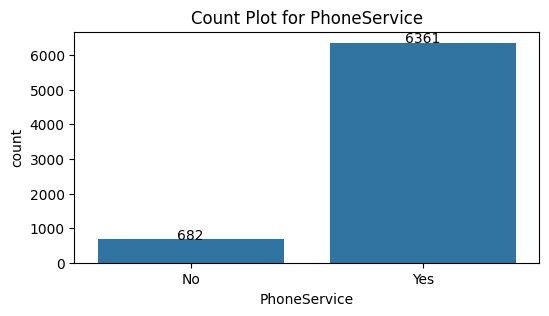

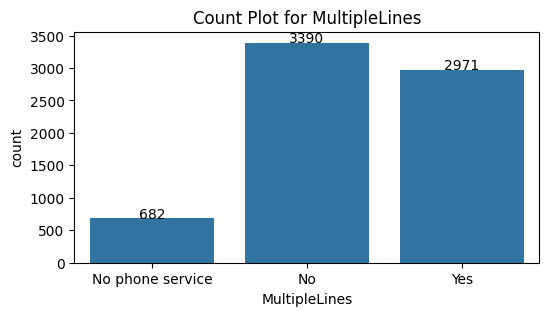

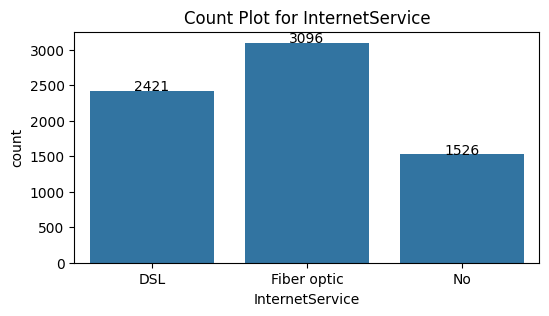

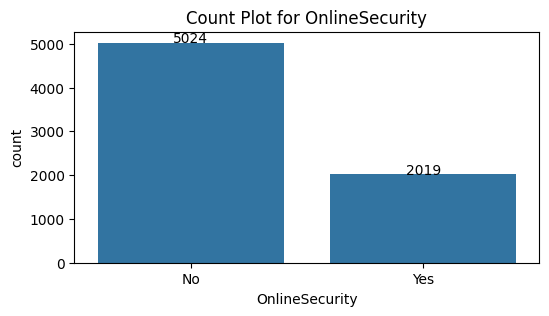

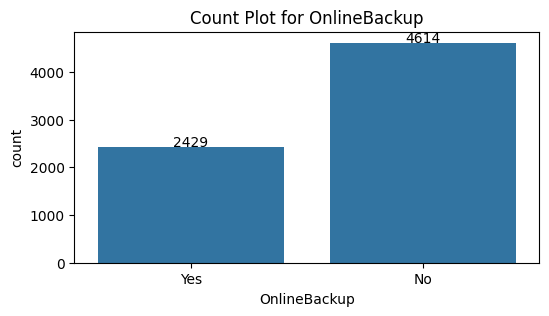

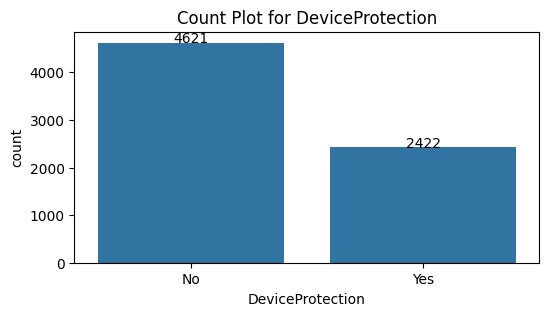

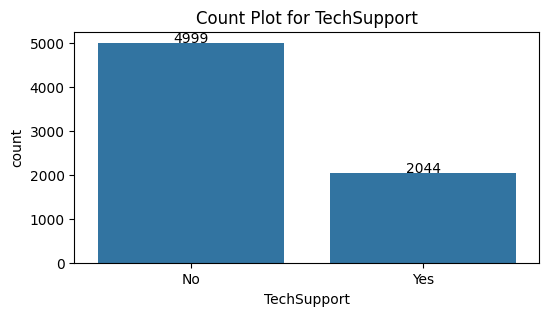

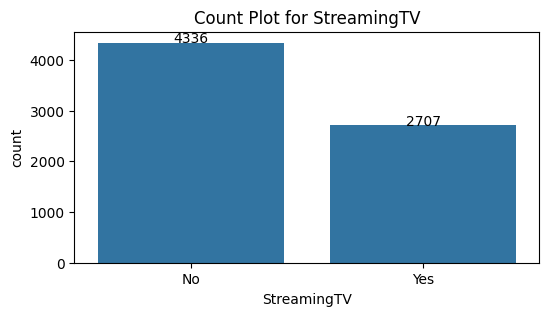

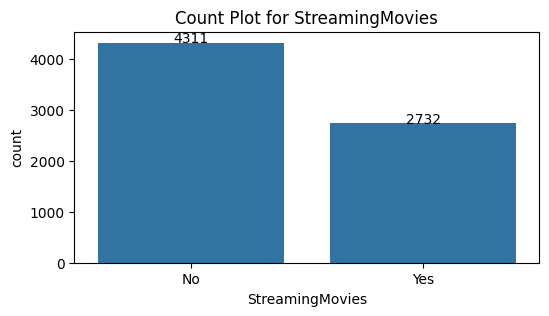

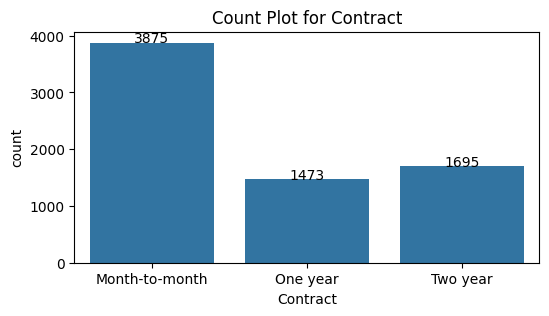

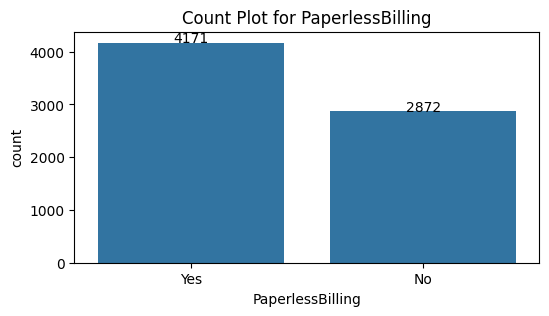

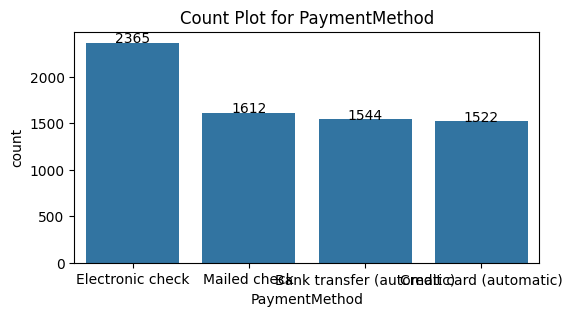

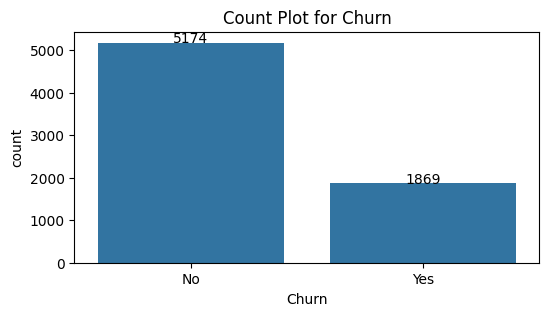

In [46]:
for col in object_cols:
    plt.figure(figsize=(6, 3))
    ax = sns.countplot(x=df[col])
    plt.title(f"Count Plot for {col}")

    # Add count numbers on each bar
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2.,  # Horizontal position: center of the bar
            p.get_height() + 1.0,            # Vertical position: slightly above the bar
            int(p.get_height()),             # Text: count number
            ha='center'                      # Horizontal alignment: center
        )

    plt.show()

**Data Preprocessing**

In [47]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [48]:
df["Churn"] = df["Churn"].replace({"Yes" : 1, "No" : 0})

C:\Users\ARYA GUPTA\AppData\Local\Temp\ipykernel_22156\519925226.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes" : 1, "No" : 0})


In [49]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [50]:
object_cols

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [51]:
import pickle
from sklearn.preprocessing import LabelEncoder

In [52]:
# initialize a dictionary to save the encoders

encoders = {}

# apply label encoding and store the encoders

for col in object_cols:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    encoders[col] = label_encoder


# save the encoders to a pickle file
with open ("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

In [53]:
encoders

{'SeniorCitizen': LabelEncoder(),
 'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder(),
 'Churn': LabelEncoder()}

**Training and test data split**

In [54]:
from sklearn.model_selection import train_test_split, cross_val_score

In [55]:
x = df.drop(columns = ['Churn'])
y = df["Churn"]

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [57]:
print(x_train.shape)
print(y_train.shape)

(5634, 19)
(5634,)


In [58]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


**Synthetic Minority Oversampling Technique (SMOTE)**

In [60]:
from imblearn.over_sampling import SMOTE

In [61]:
smote = SMOTE(random_state = 42)

In [65]:
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [67]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


**Model Training**

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [70]:
# dictionary of models

models = {
    "Decision Tree" : DecisionTreeClassifier(random_state = 42),
    "Random Forest" : RandomForestClassifier(random_state = 42),
    "XGBoost" : XGBClassifier(random_state = 42)
}

In [71]:
# dictionary to store the cross validation results
cv_scores = {}

# perform 8 fold cross validation for each model

for model_name, model in models.items():
    print(f"Training {model_name} with defailt parameters")
    scores = cross_val_score( model, x_train_smote, y_train_smote, cv = 8, scoring = "accuracy" )
    cv_scores[model_name] = scores
    print(f"{model_name} cross-validation accuracy: {np.mean(scores):.3f}")

Training Decision Tree with defailt parameters
Decision Tree cross-validation accuracy: 0.786
Training Random Forest with defailt parameters
Random Forest cross-validation accuracy: 0.839
Training XGBoost with defailt parameters
XGBoost cross-validation accuracy: 0.838


In [72]:
cv_scores

{'Decision Tree': array([0.68695652, 0.69758454, 0.70724638, 0.82028986, 0.83558994,
        0.85106383, 0.84042553, 0.85203095]),
 'Random Forest': array([0.7352657 , 0.73429952, 0.75845411, 0.90241546, 0.90232108,
        0.88878143, 0.89361702, 0.90038685]),
 'XGBoost': array([0.7352657 , 0.72077295, 0.7352657 , 0.90917874, 0.91295938,
        0.8926499 , 0.89651838, 0.89941973])}

**Model Selection and Hyperparameter Tuning**

In [78]:
from sklearn.model_selection import RandomizedSearchCV

In [86]:
#Initializing Models

decision_tree = DecisionTreeClassifier(random_state = 42)
random_forest = RandomForestClassifier(random_state = 42)
xg_boost = XGBClassifier(random_state = 42)

In [87]:
# hyperparameter frid for RandomizedSearchCV

param_grid_dt = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : [None, 5, 10, 15, 20, 30, 40, 50, 60, 65, 70, 75],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf" : [1, 2, 4]
}

param_grid_rf = {
    "n_estimators" : [50, 100, 125, 150, 200, 250, 300, 400, 500],
    "max_depth" : [None, 10, 15, 20, 25, 30, 40, 50],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf" : [1, 2, 4],
    "bootstrap" : [True, False]
}

param_grid_xgb = {
    "n_estimators" : [50, 100, 150, 200, 250, 300, 400, 500],
    "max_depth" : [3, 5, 7,10, 12, 15, 20],
    "learning_rate" : [0.005, 0.01, 0.03, 0.07, 0.1, 0.2],
    "subsample" : [0.5, 0.7, 1.0, 1.5],
    "colsample_bytree" : [0.5, 0.7, 1.0, 1.5]
}

In [88]:
# perform RandomSearchCV for each model

random_search_dt = RandomizedSearchCV(estimator = decision_tree, param_distributions = param_grid_dt, n_iter = 20, cv = 5, scoring='accuracy', random_state = 42)
random_search_rf = RandomizedSearchCV(estimator = random_forest, param_distributions = param_grid_rf, n_iter = 20, cv = 5, scoring='accuracy', random_state = 42)
random_search_xgb = RandomizedSearchCV(estimator = xg_boost, param_distributions = param_grid_xgb, n_iter = 20, cv = 5, scoring='accuracy', random_state = 42)


In [89]:
# fit the models

random_search_dt.fit(x_train_smote, y_train_smote)
random_search_rf.fit(x_train_smote, y_train_smote)
random_search_xgb.fit(x_train_smote, y_train_smote)

C:\Users\ARYA GUPTA\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ARYA GUPTA\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ARYA GUPTA\AppData\Roaming\Python\Python313\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
  File "C:\Users\ARYA GUPTA\AppData\Roaming\Python\Python313\site-packa

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0,
                                                             1.5],
                                        'learning_rate': [0.005, 0.01, 0.03,
                                                          0.07, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10, 12, 15, 20],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 400, 500],
                                        'subsample': [0.5, 0.7, 1.0, 1.5]},
                   random_state=42, scoring='accuracy')

In [90]:
print(random_search_dt.best_estimator_)
print(random_search_dt.best_score_)

DecisionTreeClassifier(max_depth=10, random_state=42)
0.8008801465329773


In [92]:
# get the model with thw best score

best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
    best_model = random_search_dt.best_estimator_
    best_score = random_search_dt.best_score_

if random_search_rf.best_score_ > best_score:
    best_model = random_search_rf.best_estimator_
    best_score = random_search_rf.best_score_

if random_search_xgb.best_score_ > best_score:
    best_model = random_search_xgb.best_estimator_
    best_score = random_search_xgb.best_score_

print(f"Best Model: {best_model}")
print(f"Best Score: {best_score}")

Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=20,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)
Best Score: 0.8353200665528263


**Evaluation**

In [93]:
y_test_pred = best_model.predict(x_test)
print("Accuracy Score: \n", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_test_pred))
print("Classification Report: \n", classification_report(y_test, y_test_pred))

Accuracy Score: 
 0.7735982966643009
Confusion Matrix: 
 [[864 172]
 [147 226]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1036
           1       0.57      0.61      0.59       373

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.78      0.77      0.78      1409



In [94]:
## save the best model

#with open("best_model.pkl", "wb") as f:
    #pickle.dump(best_model, f)